# EXPLORATION 02

## 3. 유방암 여부 진단


### 1. Imort module

In [2]:
from sklearn.datasets import load_breast_cancer # 데이터 불러오기
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score # 정확도 확인
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier # DecisionTree 모델 정의
from sklearn.linear_model import SGDClassifier # SGDClassifier 모델 정의
from sklearn.linear_model import LogisticRegression # Logistic Regression 모델 정의
from sklearn.ensemble import RandomForestClassifier # RandomForest 모델 정의
from sklearn import svm # SVM 모델 정의
from sklearn.metrics import confusion_matrix 
import numpy as np # numpy 정의
import pandas as pd # 데이터프레임을 위한 판다스 정의
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Data load

In [23]:
# 데이터 로드
breast_cancer = load_breast_cancer()
breast_cancer_data = breast_cancer.data
breast_cancer_target = breast_cancer.target
bcdf = pd.DataFrame(data=breast_cancer_data, columns=breast_cancer.feature_names) # 판다스 DataFrame 자료형 변환
# pd.set_option('display.max_columns', None) # 데이터 프레임 생략없이 출력

### 3.Data check

In [17]:
# 데이터 확인
print('분류 : ',breast_cancer.keys()) # 키
print('총 데이터 및 특징 갯수 : ',breast_cancer_data.shape) 
print('Lable : ',breast_cancer.target_names,'\n')  # 타겟(정답)에 이름
print('특징 이름 : ',breast_cancer.feature_names,'\n') # 각 특징에 설명

분류 :  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
총 데이터 및 특징 갯수 :  (569, 30)
Lable :  ['malignant' 'benign'] 

특징 :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 



- 유방암 데이터는 569개로 각각 30개의 특성을 나타내고 있습니다.
- Lable 데이터에 경우 양성종양과 악성종양으로 구분되고 있습니다.

In [21]:
bcdf.columns
bcdf.head()       # 데이터 프레임 활용

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
bcdf.describe()   # 데이터 프레임으로 위 코드에 대한 통계

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
print('데이터 설명 : ',breast_cancer.DESCR,'\n') # 데이터에 설명

데이터 설명 :  .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is

### 4. 데이터 분할

In [18]:
# 데이터 분할
x_train,x_test,y_train,y_test = train_test_split(breast_cancer_data,
                                                 breast_cancer_target,
                                                 test_size=0.2,
                                                 random_state=13)
print('number of X_train:', len(x_train), 'number of X_test:', len(x_test))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

number of X_train: 455 number of X_test: 114
(455, 30) (455,)
(114, 30) (114,)


- 테스트,훈련 데이터 분할 및 분할 갯수 확인

### 5. 모델 정의

In [44]:
# 모델 정의
decision_tree = DecisionTreeClassifier(random_state=16)
sgd_model = SGDClassifier(random_state=16)
logistic_model = LogisticRegression(random_state=16,solver='liblinear',max_iter=30000)
random_forest = RandomForestClassifier(random_state=16)
svm_model = svm.SVC(random_state=16)

- 각 시드를 16으로 조정하여 결과값 고정
- solver : 최적화 문제에 사용하는 알고리즘 max_iter : 계산에 사용할 작업 수

### 6. 각 모델별 훈련 및 예측

In [45]:
breast_cancer_accuracy = {}

# 
decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print('[Decision Tree Classifier]\n\n',classification_report(y_test,y_pred))
breast_cancer_accuracy['Decision Tree Classifier'] = accuracy_score(y_test,y_pred)

sgd_model.fit(x_train,y_train)
y_pred = sgd_model.predict(x_test)
print('\n\n[SGD Classifier]\n\n',classification_report(y_test,y_pred))
breast_cancer_accuracy['SGD Classifier'] = accuracy_score(y_test,y_pred)

logistic_model.fit(x_train,y_train)
y_pred = logistic_model.predict(x_test)
print('\n\n[Logistic Regression Classifier]\n\n',classification_report(y_test,y_pred,labels=np.unique(y_pred))) # ,한 번 예측 될  경우 관심없음
breast_cancer_accuracy['Logistic Regression Classifier'] = accuracy_score(y_test,y_pred)

random_forest.fit(x_train,y_train)
y_pred = random_forest.predict(x_test)
print('\n\n[Random Forest Classifier]\n\n',classification_report(y_test,y_pred))
breast_cancer_accuracy['Random Forest Classifier'] = accuracy_score(y_test,y_pred)

svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
print('\n\n[SVM Classifier]\n\n',classification_report(y_test,y_pred))
breast_cancer_accuracy['SVM Classifier'] = accuracy_score(y_test,y_pred)


[Decision Tree Classifier]

               precision    recall  f1-score   support

           0       0.79      0.92      0.85        36
           1       0.96      0.88      0.92        78

    accuracy                           0.89       114
   macro avg       0.87      0.90      0.88       114
weighted avg       0.90      0.89      0.90       114



[SGD Classifier]

               precision    recall  f1-score   support

           0       0.84      0.86      0.85        36
           1       0.94      0.92      0.93        78

    accuracy                           0.90       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



[Logistic Regression Classifier]

               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.95      0.96      0.96        78

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.

In [46]:
for i in breast_cancer_accuracy.items():
    print(f"{i[0]:<20} : {i[1]}")
    

Decision Tree Classifier : 0.8947368421052632
SGD Classifier       : 0.9035087719298246
Logistic Regression Classifier : 0.9385964912280702
Random Forest Classifier : 0.9473684210526315
SVM Classifier       : 0.8771929824561403


- 단순히 정확도를 기준으로 보면 Random Forest Classifier 모델이 가장 높게 나왔다.
- 하지만 더 다양한 측정 기준을 사용해보자

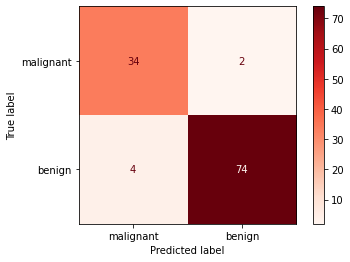

In [70]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(random_forest, x_test, y_test, values_format='d',display_labels=breast_cancer.target_names,cmap=plt.cm.Reds)

- Confusion matrix를 시각화 한 결과이다
좌측 상단부터 오른쪽으로 1(TP),2(FN) 좌측 하단으로부터 3(FP),4(TN)이다 

malignant(악성종양) 을 Positive라고 하고, benign(양성종양) 을 Positive을 negative 라고 한다.
추가적으로, malignant는 암을 지칭하는 종양이고, benign는 암이 아닌 종양이다.
True Positive 는 malignant(악성종양)을 malignant(악성종양)이라고 올바르게 예측한 것이다.
True Negative 는 benign(양성종양)을 benign(양성종양)이라고 올바르게 예측한 것이다.
False Positive benign(양성종양)을 malignant(악성종양)이라고 잘못 예측한 것이다.
False Negative malignant(악성종양)을 benign(양성종양)이라고 잘못 예측한 것이다.

여기서 False Negative 의 경우, 암환자를 정상으로 예측 한 것이므로 생명을 위협할 수 있는 중요한 요소이다.


## 7.프로젝트 정리

     유방암 예측에 경우 악성 종양을 찾는것이 최우선 과제이기 때문에 악성종양을 예측하는 결과값이 잘 나오는게 중요하다.
     건강한 사람을 오인하는 경우에는 문제가 없지만 양성환자에게 오인하여 잘못 판단 할 경우 그 환자는 크게 위험할 수 있다.
    
     정확도면에서 다른 모델보다 우수했던 Random_Forest의 경우 정확도 말고도 다른 결과도 타 모델에 비해 우수한 성적이 나왔음으로
     유방암 예측은 Random_Forest 모델을 5개의 모델중 추천한다.
     
     시각화와 전처리,성능평가에 관해 보다 많은것을 배울 수 있었고 많은것을 생각할 수 있게 만들던 파트였다. scikit-learn 데이터 덕분에
     좀 더 수월하게 모델들을 학습할 수 있었던 계기가 되었던것같다.